# Preprocessing and Modeling (Brain Tumor Classification)

## Step 1: Importing Libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.preprocessing import image
from keras.layers import Dense, Flatten, Conv2D, BatchNormalization, MaxPool2D, MaxPooling2D, Dropout, Activation
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from tqdm import tqdm
from sklearn.utils import shuffle
import ipywidgets as widgets
import io
import time
import os, sys, os.path
from PIL import Image, ImageOps
import scipy.ndimage as ndi
from skimage import color
from skimage.filters import gaussian
import cv2, PIL
import itertools
from IPython.display import display,clear_output
from warnings import filterwarnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Step 2: Data Preparation

In [2]:
training_path = "../BrainTumorDataClean/Training/"
validation_path = "../BrainTumorDataClean/Validation/"
test_path = "../BrainTumorDataClean/Testing/"

labels = ['Glioma','Meningioma','NoTumor','Pituitary']

In [3]:
X_train = []
y_train = []
image_size = 128
for i in labels:
    folderPath = os.path.join(training_path, i)
    for j in tqdm(os.listdir(folderPath)):
        img = plt.imread(os.path.join(folderPath,j))
        # img = cv2.resize(img,(image_size, image_size))
        X_train.append(img)
        y_train.append(i)
X_train = np.array(X_train)
y_train = np.array(y_train)

100%|██████████| 1254/1254 [00:00<00:00, 2780.27it/s]


In [4]:
X_valid = []
y_valid = []
image_size = 128
for i in labels:
    folderPath = os.path.join(validation_path, i)
    for j in tqdm(os.listdir(folderPath)):
        img = plt.imread(os.path.join(folderPath,j))
        # img = cv2.resize(img,(image_size, image_size))
        X_valid.append(img)
        y_valid.append(i)
X_valid = np.array(X_valid)
y_valid = np.array(y_valid)

100%|██████████| 264/264 [00:00<00:00, 2537.94it/s]


In [5]:
X_test = []
y_test = []
image_size = 128
for i in labels:
    folderPath = os.path.join(test_path, i)
    for j in tqdm(os.listdir(folderPath)):
        img = plt.imread(os.path.join(folderPath,j))
        # img = cv2.resize(img,(image_size, image_size))
        X_test.append(img)
        y_test.append(i)
X_test = np.array(X_test)
y_test = np.array(y_test)

100%|██████████| 239/239 [00:00<00:00, 2388.69it/s]


In [6]:
X_train, y_train = shuffle(X_train, y_train, random_state=101)

In [7]:
X_valid, y_valid = shuffle(X_valid, y_valid, random_state=101)

In [8]:
X_test, y_test = shuffle(X_test, y_test, random_state=101)

In [9]:
X_train.shape, X_valid.shape, X_test.shape

((4923, 128, 128), (1050, 128, 128), (1050, 128, 128))

In [10]:
y_train.shape, y_valid.shape, y_test.shape

((4923,), (1050,), (1050,))

In [11]:
labels.index('NoTumor')
y_test[:20]

array(['Pituitary', 'NoTumor', 'Meningioma', 'Meningioma', 'NoTumor',
       'Meningioma', 'Meningioma', 'Pituitary', 'NoTumor', 'Pituitary',
       'NoTumor', 'Pituitary', 'Glioma', 'NoTumor', 'NoTumor',
       'Meningioma', 'Meningioma', 'NoTumor', 'NoTumor', 'Meningioma'],
      dtype='<U10')

C:\Users\shaja\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


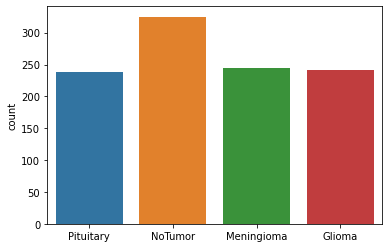

In [12]:
sns.countplot(y_test)
plt.show()

## One hot encoding to the image labels

In [13]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

In [14]:
y_valid_new = []
for i in y_test:
    y_valid_new.append(labels.index(i))
y_valid = y_valid_new
y_valid = tf.keras.utils.to_categorical(y_valid)

In [15]:
y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [16]:
# Copy of y_test
y_test1 = y_test
y_test2 = y_test
y_test3 = y_test
y_test4 = y_test
y_test5 = y_test
y_test6 = y_test
y_test7 = y_test

In [17]:
y_train.shape, y_valid.shape, y_test.shape

((4923, 4), (1050, 4), (1050, 4))

In [18]:
y_train[:10], y_valid[:10], y_test[:10]

(array([[0., 0., 0., 1.],
        [0., 0., 1., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.],
        [1., 0., 0., 0.],
        [0., 0., 0., 1.],
        [1., 0., 0., 0.],
        [0., 1., 0., 0.]], dtype=float32),
 array([[0., 0., 0., 1.],
        [0., 0., 1., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 0., 1.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]], dtype=float32),
 array([[0., 0., 0., 1.],
        [0., 0., 1., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 0., 1.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]], dtype=float32))

## Step 3: Modeling

### Model 1 - Implementing a Simple Neural Network using  dense layers

In [19]:
# Specify the Simple model using Dense Layer [optimizer = 'adam']

model1 = Sequential()

model1.add(Flatten(input_shape=(128,128,1)))

model1.add(Dense(512, activation='relu'))

model1.add(Dense(256, activation='relu'))

model1.add(Dense(128, activation='relu'))

model1.add(Dense(64, activation='relu'))

model1.add(Dense(32, activation='relu'))

model1.add(Dense(16, activation='relu'))

model1.add(Dense(4, activation='softmax'))

In [20]:
# Compile the model with learning_rate=0.001
early_stopping_monitor1 = EarlyStopping(patience=5)
model1.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

model.compile(loss='categorical_crossentropy',optimizer = 'Adam', metrics= ['accuracy'])
tensorboard = TensorBoard(log_dir = 'logs')
checkpoint = ModelCheckpoint("effnet.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 2, min_delta = 0.001,
                              mode='auto',verbose=1)
history = model.fit(X_train,y_train,validation_split=0.1, epochs =12, verbose=1, batch_size=32,
                   callbacks=[tensorboard,checkpoint,reduce_lr])

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.3, patience=2, min_denta=0.0001, mode='auto', verbose=1)
tensorboard = TensorBoard(log_dir='logs')
checkpoint = ModelCheckpoint("brain_tumor_classification.h5", monitor='val_accuracy', save_best_only=True, mode='auto', verbose=1)
history = model.fit(X_train, Y_train, batch_size=32,
                              validation_data=(X_val, Y_val), 
                              epochs=30, m
                              verbose=1,
                            callbacks=[tensorboard, checkpoint, reduce_lr])

In [21]:
# X_train, y_train
# validation_data=(X_valid, y_valid)
# X_test, y_test
history1 = model1.fit(X_train, y_train, validation_data=(X_valid, y_valid),\
           epochs=30, callbacks = [early_stopping_monitor1])

Epoch 1/30
154/154 [==============================] - 7s 44ms/step - loss: 31.7968 - accuracy: 0.4867 - val_loss: 11.7753 - val_accuracy: 0.5248
Epoch 2/30
154/154 [==============================] - 7s 43ms/step - loss: 3.4656 - accuracy: 0.6736 - val_loss: 3.8275 - val_accuracy: 0.7086
Epoch 3/30
154/154 [==============================] - 6s 39ms/step - loss: 1.9406 - accuracy: 0.7319 - val_loss: 3.0783 - val_accuracy: 0.6886
Epoch 4/30
154/154 [==============================] - 6s 39ms/step - loss: 1.4287 - accuracy: 0.7617 - val_loss: 3.4107 - val_accuracy: 0.6295
Epoch 5/30
154/154 [==============================] - 7s 43ms/step - loss: 0.9702 - accuracy: 0.7924 - val_loss: 2.1310 - val_accuracy: 0.6762
Epoch 6/30
154/154 [==============================] - 7s 43ms/step - loss: 0.7792 - accuracy: 0.8113 - val_loss: 1.5859 - val_accuracy: 0.7743
Epoch 7/30
154/154 [==============================] - 6s 38ms/step - loss: 0.6026 - accuracy: 0.8357 - val_loss: 1.7679 - val_accuracy: 0.73

In [22]:
model1.evaluate(X_test, y_test)

33/33 [==============================] - 0s 8ms/step - loss: 0.6729 - accuracy: 0.8562


[0.6729249358177185, 0.8561905026435852]

In [23]:
y_pred1 = model1.predict(X_test)

In [24]:
y_pred = np.argmax(y_pred1, axis=-1)
y_true = np.argmax(y_test, axis=-1)
print(np.sum(y_pred==y_true)/len(y_true))

0.8561904761904762


### Model 2 (Implementing a Simple Convolutional Neural Network Model Architecture)

In [25]:
model2 = Sequential()

model2.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(128,128,1)))
model2.add(MaxPool2D(pool_size=(2, 2), strides=2))

model2.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model2.add(MaxPool2D(pool_size=(2, 2), strides=2))

model2.add(Flatten())

model2.add(Dense(units=4, activation='softmax'))

In [26]:
early_stopping_monitor2 = EarlyStopping(patience=5)
model2.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# X_train, y_train
# validation_data=(X_valid, y_valid)
# X_test, y_test
history2 = model2.fit(X_train, y_train, validation_data=(X_valid, y_valid),\
           epochs=30, callbacks = [early_stopping_monitor2])

Epoch 1/30
154/154 [==============================] - 38s 242ms/step - loss: 3.2888 - accuracy: 0.7388 - val_loss: 0.7084 - val_accuracy: 0.8314
Epoch 2/30
 73/154 [=============>................] - ETA: 17s - loss: 0.2547 - accuracy: 0.9204

In [ ]:
model2.evaluate(X_test, y_test)

In [ ]:
y_pred2 = model2.predict(X_test)

In [ ]:
y_pred1 = np.argmax(y_pred2, axis=-1)
y_true1 = np.argmax(y_test, axis=-1)
print(np.sum(y_pred1==y_true1)/len(y_true1))

### Model 3 Verifying LeNet-5 architecture

In [ ]:
# Defining Historical LeNet-5 Architecture
model3 = Sequential()

model3.add(Conv2D(20, (5,5), activation='relu', padding = 'same', strides=1, input_shape = (128,128,1)))
model3.add(MaxPool2D((2,2), strides=2))

model3.add(Conv2D(50, (5,5), activation='relu', strides=1, padding = 'same'))
model3.add(MaxPool2D((2,2), strides=2))

model3.add(Flatten())

model3.add(Dense(512, activation='relu'))

model3.add(Dense(4, activation='softmax'))

In [ ]:
# Compile the model
early_stopping_monitor = EarlyStopping(patience=5)
model3.compile(optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
    name='Adam'), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Fit the model
history3 = model3.fit(X_train, y_train, epochs = 30, batch_size=32, \
                      validation_data = (X_valid, y_valid), callbacks=[early_stopping_monitor])

In [ ]:
model3.evaluate(X_test, y_test)

In [ ]:
y_pred3 = model3.predict(X_test)

### Model 4

In [ ]:
# Adding BatchNormalization and Dropout layer to previous model to maximize generalization or minimize overfitting

model4 = Sequential()

# Convolutional layer 1
model4.add(Conv2D(32,(3,3), input_shape=(128,128,1), activation='relu'))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2,2)))

# Convolutional layer 2
model4.add(Conv2D(32,(3,3), activation='relu'))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2,2)))

model4.add(Flatten())

# Neural network

model4.add(Dense(units= 252, activation='relu'))
model4.add(Dropout(0.2))

model4.add(Dense(units=252, activation='relu'))
model4.add(Dropout(0.2))

model4.add(Dense(units=4, activation='softmax'))

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, decay=0.0001, clipvalue=0.5)
model4.compile(optimizer=optimizer, loss='categorical_crossentropy',
                   metrics= ['accuracy'])
early_stopping_monitor = EarlyStopping(patience=5)

In [ ]:
history4 = model4.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid),
                     callbacks=[early_stopping_monitor])

In [ ]:
model4.evaluate(X_test, y_test)

In [ ]:
y_pred4 = model4.predict(X_test)

### Model 5 Implementing complex CNN Model

In [ ]:
# Specifying Model Architecture (Convolutional Neural Network)
model5 = Sequential()

# Convolutional layer, Batch Normalization layer, and maxpool layer 1
model5.add(Conv2D(32,(3,3),activation='relu',input_shape=(128,128,1)))
# model5.add(BatchNormalization())
model5.add(MaxPool2D(2,2))

# Convolutional layer,  Batch Normalization layer, and maxpool layer 2
model5.add(Conv2D(64,(3,3),activation='relu'))
# model5.add(BatchNormalization())
model5.add(MaxPool2D(2,2))

# Convolutional layer,  Batch Normalization layer, and maxpool layer 3
model5.add(Conv2D(128,(3,3),activation='relu'))
# model5.add(BatchNormalization())
model5.add(MaxPool2D(2,2))

# Convolutional layer,  Batch Normalization layer, and maxpool layer 4
model5.add(Conv2D(256,(3,3),activation='relu'))
# model5.add(BatchNormalization())
model5.add(MaxPool2D(2,2))

# This layer flattens the resulting image array to 1D array
model5.add(Flatten())

# Hidden layer with 512 neurons and Rectified Linear Unit activation function 
model5.add(Dense(512,activation='relu'))
# model5.add(Dropout(0.25))

# Output layer with single neuron which gives 0 for Cat or 1 for Dog 
#Here we use sigmoid activation function which makes our model output to lie between 0 and 1
model5.add(Dense(4,activation='softmax'))

In [ ]:
# optimizer=optimizers.SGD(lr=1e-4, momentum=0.9)
early_stopping_monitor5 = EarlyStopping(patience=5)
model5.compile(optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
    name='Adam'), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:

history5 = model5.fit(X_train, y_train, epochs = 30, batch_size=32, validation_data = (X_valid, y_valid), \
           callbacks = [early_stopping_monitor5])

In [ ]:
model5.evaluate(X_test, y_test)

In [ ]:
y_pred5 = model5.predict(X_test)

### Model 6

In [ ]:
# Specifying Model Architecture (Convolutional Neural Network)
model6 = Sequential()

# Convolutional layer, Batch Normalization layer, and maxpool layer 1
model6.add(Conv2D(32,(3,3),activation='relu',input_shape=(128,128,1)))
model6.add(BatchNormalization())
model6.add(MaxPool2D(2,2))

# Convolutional layer,  Batch Normalization layer, and maxpool layer 2
model6.add(Conv2D(64,(3,3),activation='relu'))
model6.add(BatchNormalization())
model6.add(MaxPool2D(2,2))

# Convolutional layer,  Batch Normalization layer, and maxpool layer 3
model6.add(Conv2D(128,(3,3),activation='relu'))
model6.add(BatchNormalization())
model6.add(MaxPool2D(2,2))

# Convolutional layer,  Batch Normalization layer, and maxpool layer 4
model6.add(Conv2D(256,(3,3),activation='relu'))
model6.add(BatchNormalization())
model6.add(MaxPool2D(2,2))

# This layer flattens the resulting image array to 1D array
model6.add(Flatten())

# Hidden layer with 512 neurons and Rectified Linear Unit activation function 
model6.add(Dense(512,activation='relu'))
model6.add(Dropout(0.25))

# Output layer with 4 neurons for 4 classes 
model6.add(Dense(4,activation='softmax'))

In [ ]:
early_stopping_monitor6 = EarlyStopping(patience=5)
model6.compile(optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
    name='Adam'), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:

history6 = model6.fit(X_train, y_train, epochs = 30, batch_size=32, validation_data = (X_valid, y_valid), \
           callbacks = [early_stopping_monitor6])

In [ ]:
model6.evaluate(X_test, y_test)

In [ ]:
y_pred6 = model6.predict(X_test)

## Model 7: Complex Model

In [ ]:
model7 = Sequential()

# Convolutional layer 1
model7.add(Conv2D(64,(5,5), input_shape=(128,128, 1), padding='same', activation='relu'))
model7.add(BatchNormalization())
model7.add(MaxPooling2D(pool_size=(2,2)))

#Convolutional layer 2
model7.add(Conv2D(128,(5,5), padding='same', activation='relu'))
model7.add(BatchNormalization())
model7.add(MaxPooling2D(pool_size=(2,2)))

# Convolutional layer 3
model7.add(Conv2D(256,(5,5), padding='same', activation='relu'))
model7.add(BatchNormalization())
model7.add(MaxPooling2D(pool_size=(2,2)))

# Convolutional layer 4
model7.add(Conv2D(512,(5,5), padding='same', activation='relu'))
model7.add(BatchNormalization())
model7.add(MaxPooling2D(pool_size=(2,2)))


model7.add(Flatten())

# Fully connected layers

model7.add(Dense(units= 512, activation='relu'))
model7.add(Dropout(0.2))

model7.add(Dense(units=512, activation='relu'))
model7.add(Dropout(0.2))

model7.add(Dense(units=4, activation='softmax'))

In [ ]:
early_stopping_monitor6 = EarlyStopping(patience=5)
model7.compile(optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
    name='Adam'), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:

history7 = model7.fit(X_train, y_train, epochs = 30, batch_size=32, validation_data = (X_valid, y_valid), \
           callbacks = [early_stopping_monitor6])

In [ ]:
model7.evaluate(X_test, y_test)

In [ ]:
y_pred7 = model7.predict(X_test)

## Visualizing Models Performance

In [ ]:
Print(y_pred8)

In [ ]:
# Plot the loss and accuracy curves for training and validation 
def epoch_vs_progress(history_name, model_name):
    fig, ax = plt.subplots(2,1, figsize=(12,8))
    ax[0].plot(history_name.history['loss'], color='b', marker='o', label="Training loss")
    ax[0].plot(history_name.history['val_loss'], color='r', marker='o', label="validation loss",axes =ax[0])
    ax[0].set_title(f"Epochs vs. Training and Validation Loss for {model_name}")
    legend = ax[0].legend(loc='best', shadow=True)

    ax[1].plot(history_name.history['accuracy'], color='b', marker='o', label="Training accuracy")
    ax[1].plot(history_name.history['val_accuracy'], color='r',marker='o', label="Validation accuracy")
    ax[1].set_title(f"Epochs vs. Training and Validation Accuracy for {model_name}")
    legend = ax[1].legend(loc='best', shadow=True)
epoch_vs_progress(history7, 'model7')

In [ ]:
# Create the plot
# type(history1)
# history1.history.items()
plt.plot(history1.history['loss'], 'b', label='training loss')
plt.plot(history1.history['val_loss'], 'r', label='validation loss')
plt.xlabel('Epochs', )
plt.ylabel('Validation score')
plt.legend()
plt.show()

In [ ]:
# labels = ['Glioma','Meningioma','NoTumor','Pituitary']
def get_all_metrics(true_category, pred_category, model_name, history_name):
    """
    Confusion matrix and model performance metric visualization
    """
    labels = ['Glioma','Meningioma','NoTumor','Pituitary']
    y_true = np.argmax(true_category, axis=-1)
    y_pred = np.argmax(pred_category, axis=-1)
    
    print(f"\nMax. training accuracy for {model_name}: {max(history_name.history['accuracy'])*100:.2f}%")
    print(f"Max. validation accuracy for {model_name}: {max(history_name.history['val_accuracy'])*100:.2f}%")
    
    accuracy = np.sum(y_true == y_pred)/len(y_true)
    print(f"Test accuracy for {model_name}: {(accuracy*100):.2f}%")
    
    print(f"\nClassification Report for {model_name}:\n\n", classification_report(y_true, y_pred))
    
    fig, ax = plt.subplots(figsize=(16,8))
    sns.heatmap(confusion_matrix(y_true, y_pred),xticklabels=labels,yticklabels=labels,annot=True,
           cmap="Greens",alpha=0.7, ax=ax, linewidths=2,linecolor='gray',fmt='d')
    fig.text(s=f'      Confusion Matrix for {model_name}',size=18,fontweight='bold',
            fontname='monospace',color='g',y=0.92,x=0.28,alpha=0.7)
    plt.savefig(f"../Figures/Confusion_Matrix/{model_name}")
    plt.show()

In [ ]:
get_all_metrics(y_test1, y_pred1, 'model_1', history1)

In [ ]:
get_all_metrics(y_test2, y_pred2, 'model_2', history2)

In [ ]:
get_all_metrics(y_test3, y_pred3, 'model_3', history3)

In [ ]:
get_all_metrics(y_test4, y_pred4, 'model_4', history4)

In [ ]:
get_all_metrics(y_test5, y_pred5, 'model_5', history5)

In [ ]:
get_all_metrics(y_test6, y_pred6, 'model_6', history6)

In [ ]:
get_all_metrics(y_test7, y_pred7, 'model_7', history7)

In [ ]:
epoch_vs_progress(history7)

## Save a Model

In [ ]:
# serialize model to JSON
from keras.models import model_from_json
model_json = classifier.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [ ]:
# serialize weights to HDF5
classifier.save_weights("model.h5")
print("Saved model to disk")

## For later use

In [ ]:
cm = confusion_matrix(y_true=np.argmax(y_test, axis=-1), y_pred=np.argmax(y_pred1, axis=-1))
cm_plot_labels = ['Glioma', 'Meningioma', 'NoTumor', 'Pituitary']

In [ ]:
def plot_confusion_matrix(cm, classes=cm_plot_labels,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [ ]:
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_red = ["#331313", "#582626", '#9E1717', '#D35151', '#E9B4B4']
colors_green = ['#01411C','#4B6F44','#4F7942','#74C365','#D0F0C0']

print(classification_report(true_labels, pred_labels))

fig,ax=plt.subplots(1,1,figsize=(14,7))
sns.heatmap(confusion_matrix(true_labels, pred_labels),ax=ax,xticklabels=labels,yticklabels=labels,annot=True,
           cmap=colors_green,alpha=0.5,linewidths=2,linecolor=colors_dark[3],fmt='d')
fig.text(s='Heatmap of the Confusion Matrix',size=18,fontweight='bold',
            fontname='monospace',color='k',y=0.92,x=0.28,alpha=0.8)

plt.show()

In [ ]:
# Data Preparation for keras nodel
train_img = []
train_labels = []

test_img = []
test_labels = []

path_train = ('/kaggle/input/brain-tumor-classification-mri/Training/')
path_test = ('/kaggle/input/brain-tumor-classification-mri/Testing/')
img_size= 300

for i in os.listdir(path_train):
    for j in os.listdir(path_train+i):
        train_img.append (cv2.resize(cv2.imread(path_train+i+'/'+j), (img_size,img_size))) 
        train_labels.append(i)
        
for i in os.listdir(path_test):
    for j in os.listdir(path_test+i):
        test_img.append (cv2.resize(cv2.imread(path_test+i+'/'+j), (img_size,img_size))) 
        test_labels.append(i)
        
train_img = (np.array(train_img))
test_img = (np.array(test_img))
train_labels_encoded = [0 if category == 'no_tumor' else(1 if category == 'glioma_tumor' else(2 if category=='meningioma_tumor' else 3)) for category in list(train_labels)]
test_labels_encoded = [0 if category == 'no_tumor' else(1 if category == 'glioma_tumor' else(2 if category=='meningioma_tumor' else 3)) for category in list(test_labels)]

In [ ]:
"""

#steps_per_epoch = train_imagesize/batch_size
result = 0
model_evaluate = []
start = time.time()
for i in range(5):
    model.fit(train_dataset,
             epochs = 10, batch_size=10,
             validation_data = 0.0  
             )
    result = model.evaluate(test_dataset)
    model_evaluate.append(result[1])
end = time.time()
print(end - start)

"""

In [ ]:
# Early Stopping
tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=0,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [ ]:
"""
RMSprop(
    learning_rate=0.001, rho=0.9, momentum=0.0, epsilon=1e-07, centered=False,
    name='RMSprop', **kwargs
)
Adam(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
    name='Adam', **kwargs
)

"""

In [ ]:
image_size = 300
effnet = EfficientNetB0(weights='imagenet',include_top=False,input_shape=(image_size,image_size,3))
model = effnet.output
model = tf.keras.layers.GlobalAveragePooling2D()(model)
model = tf.keras.layers.Dropout(rate=0.5)(model)
model = tf.keras.layers.Dense(4,activation='softmax')(model)
model = tf.keras.models.Model(inputs=effnet.input, outputs = model)

In [ ]:
import visualkeras
visualkeras.layered_view(model)

In [ ]:
import visualkeras

model = ...

visualkeras.layered_view(model).show() # display using your system viewer
visualkeras.layered_view(model, to_file='output.png') # write to disk
visualkeras.layered_view(model, to_file='output.png').show() # write and show

In [ ]:
from PIL import ImageFont

font = ImageFont.truetype("arial.ttf", 32)  # using comic sans is strictly prohibited!
visualkeras.layered_view(model, legend=True, font=font)  # font is optional!

In [ ]:
# https://pypi.org/project/visualkeras/

In [ ]:
# load json and create model
'''
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
'''

In [ ]:
# load weights into new model
'''
loaded_model.load_weights("model.h5")
print("Loaded model from disk")
'''

In [ ]:
'''
# Individual predictions
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('dataset/single_prediction/OIP.jpg', target_size = (512, 512)) # Cargamos la imagen con un tamaño igual a
                                                                                           # los anteriores
test_image = image.img_to_array(test_image) # Convertimos la imagen en un array
test_image = np.expand_dims(test_image, axis = 0) # Modificamos las dimensions
result = classifier.predict(test_image) # Prediccion
print(training_dataset.class_indices)
print(result)
'''

In [ ]:
# evaluate loaded model on test data
'''
loaded_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
score = loaded_model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))
'''

Summary 1: horizontalflip=True, (64,64)
model 1=0.88 , model2=0.9419, model3=0.9695, model4=0.9771, model5=0.9629, model6=0.9695
Summary 2: (64,64)
model 1=0.8990 , model2=0.9333, model3=0.9600, model4=0.9610, model5=, model6=0.9533
Summary 3: horizontalflip=True, (128,128)
model 1=0.84 , model2=0.9162, model3=0.9790, model4=0.9657, model5=, model6=0.9552
Summary 4: (128,128)
model 1=0.92 , model2=0.9467, model3=0.9638, model4=0.8971, model5=, model6=0.9457